In [3]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width=5.0, repr.plot.height=4.0, repr.plot.res=300)

In [7]:
library(ggplot2)
library(ggthemes)
library(scales)

In [5]:
summary = read.csv("../data/obesity_by_steps_gender_20170508.csv") 

In [13]:
use_order <- c('(1000, 2000]', '(2000, 3000]', '(3000, 4000]', '(4000, 5000]', '(5000, 6000]', 
                  '(6000, 7000]', '(7000, 8000]', '(8000, 9000]', '(9000, 10000]', '(10000, 11000]')
summary$steps_binned <- factor(summary$steps_binned, levels=use_order)

summary$gender = factor(summary$gender, levels=c("male", "female"))

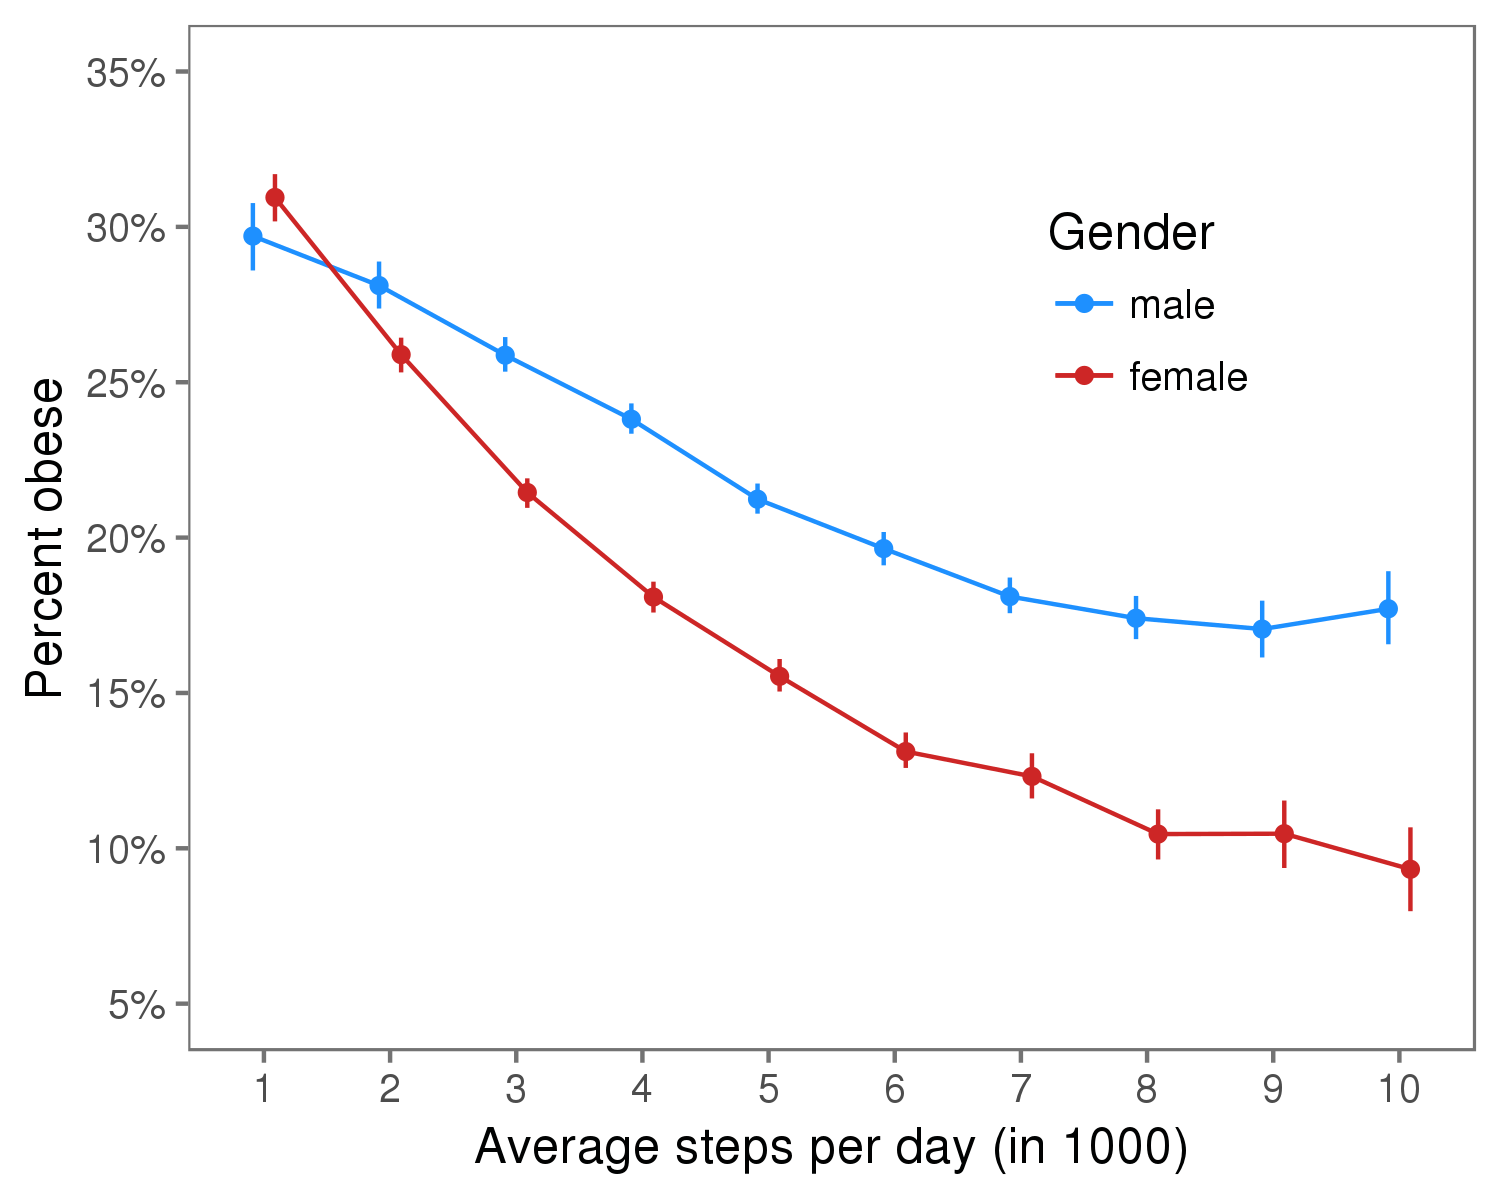

In [14]:
dodgewidth = .35

p <- ggplot(summary, aes(steps_binned, obesity_mean, colour = gender))
p <- p + stat_summary(fun.y = mean, geom = "point", position = position_dodge(width = dodgewidth))
p <- p + stat_summary(fun.y = mean, geom = "line", aes(group=gender), position = position_dodge(width = dodgewidth))
p <- p + geom_errorbar(aes(ymin=lower.ci, ymax=upper.ci), width = 0.0, position = position_dodge(width = dodgewidth))

p <- p + scale_color_manual(values=c("dodgerblue", "firebrick3"), name="Gender")
p <- p + ylab("Percent obese") + xlab("Average steps per day (in 1000)")
p <- p + theme_few(base_size=12, base_family="Helvetica")
p <- p + theme(legend.justification=c(0,0), legend.position=c(.65,.6))

# yticks
ticks = seq(.0,.40,by=0.05) 
labels = rep("", length(ticks))
labels[seq(1, length(labels), 1)] = percent(ticks[seq(1, length(labels), 1)])
p <- p + scale_y_continuous(breaks=ticks, labels=labels)

# xticks
p <- p + scale_x_discrete(labels=c(1:11))
p <- p + coord_cartesian(ylim=c(.05, .35))

p

ggsave(filename="../output/fig2c.pdf", plot=p, width=4, height=3)

For both males (blue) and females (red), a larger number of steps recorded is associated with lower obesity, but for females, the prevalence of obesity increases more rapidly as step volume decreases (232% obesity increase for females vs. 67% increase for males; comparing lowest vs. highest activity).

In [19]:
# Percentage increase in obesity from right to left

MALE_LEFT = mean(summary[(summary$steps_binned=='(1000, 2000]') &
                        (summary$gender=="male"), ]$obesity_mean)
MALE_RIGHT = mean(summary[(summary$steps_binned=='(10000, 11000]') &
                        (summary$gender=="male"), ]$obesity_mean)

FEMALE_LEFT = mean(summary[(summary$steps_binned=='(1000, 2000]') &
                        (summary$gender=="female"), ]$obesity_mean)
FEMALE_RIGHT = mean(summary[(summary$steps_binned=='(10000, 11000]') &
                        (summary$gender=="female"), ]$obesity_mean)

MALE_LEFT
MALE_RIGHT
FEMALE_LEFT
FEMALE_RIGHT

MALE_LEFT / MALE_RIGHT - 1.0 # 67% increase
FEMALE_LEFT / FEMALE_RIGHT - 1.0 # 232% increase

[1] 0.2970341

[1] 0.1770881

[1] 0.3094649

[1] 0.09325513

[1] 0.6773239

[1] 2.318475